In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm

In [3]:
print(sys.version)
print(torch.__version__)


3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]
2.1.0+cu121


In [4]:
class PlayingCardDataset(Dataset):
    
    def __init__(self, data_dir,transform=None):

        self.data = ImageFolder(data_dir,transform=transform)

    

    def __len__(self):

        return len(self.data)
    

    def __getitem__(self,idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes

In [5]:
dataset = PlayingCardDataset(data_dir='D:\\VS code files\\pytourch\\train')

In [6]:
len(dataset)

7624

In [7]:
dataset[9]

(<PIL.Image.Image image mode=RGB size=224x224>, 0)

6


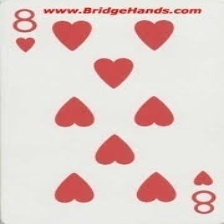

In [8]:
image, label =dataset[1000]
print(label)
image

In [9]:
data_dir = 'D:\\VS code files\\pytourch\\train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [10]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
])

data_dir = 'D:\\VS code files\\pytourch\\train'
dataset = PlayingCardDataset(data_dir, transform)

In [11]:
dataset[100]

(tensor([[[0.0000, 0.0039, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0078, 0.0431,  ..., 0.0196, 0.0039, 0.0078],
          [0.0235, 0.0392, 0.3490,  ..., 0.2392, 0.0314, 0.0118],
          ...,
          [0.0039, 0.0235, 0.2392,  ..., 0.2196, 0.0314, 0.0118],
          [0.0039, 0.0039, 0.0235,  ..., 0.0118, 0.0078, 0.0039],
          [0.0039, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],
 
         [[0.0078, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0392,  ..., 0.0196, 0.0039, 0.0078],
          [0.0078, 0.0275, 0.3373,  ..., 0.2392, 0.0275, 0.0078],
          ...,
          [0.0039, 0.0235, 0.2431,  ..., 0.2196, 0.0314, 0.0078],
          [0.0039, 0.0039, 0.0235,  ..., 0.0157, 0.0078, 0.0039],
          [0.0039, 0.0078, 0.0039,  ..., 0.0078, 0.0078, 0.0039]],
 
         [[0.0196, 0.0196, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
          [0.0118, 0.0078, 0.0353,  ..., 0.0157, 0.0039, 0.0078],
          [0.0118, 0.0196, 0.3137,  ...,

DataLoader

In [12]:
dataloder=DataLoader(dataset,batch_size=32,shuffle=True)

In [13]:
for images,label in dataloder:
    break

In [14]:
images.shape

torch.Size([32, 3, 128, 128])

In [15]:
label

tensor([21, 25, 33,  7, 13, 50, 44, 25,  5, 10, 30,  0,  9, 22, 37, 48, 30,  4,
        37, 18, 26, 29, 17, 51, 49, 11, 12, 22, 24, 33,  6, 13])

Pytorch Model

In [16]:
class SimpleCardClassifier(nn.Module):
    
    def __init__(self,num_classes=53):
        super(SimpleCardClassifier,self).__init__()
        self.base_model = timm.create_model('efficientnet_b0',pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        self.classifier = nn.Linear(enet_out_size,num_classes)
    
    def forward(self,x):
        x = self.features(x)
        output = self.classifier(x)
        return output

In [17]:
model = SimpleCardClassifier(num_classes=53)

In [18]:
print(str(model)[:500])

SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fa


In [19]:
example_out=model(images)
example_out.shape

torch.Size([32, 53])

In [20]:
# Loss Functions
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)


In [21]:
criterion(example_out,label)

tensor(3.9986, grad_fn=<NllLossBackward0>)

In [22]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = 'D:\\VS code files\\pytourch\\train'
valid_folder = 'D:\\VS code files\\pytourch\\valid'
test_folder = 'D:\\VS code files\\pytourch\\test'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [25]:
# Simple training loop
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifier(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'):
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)
         
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")


Validation loop: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]


Epoch 1/5 - Train loss: 1.5359647881321743, Validation loss: 0.4213962467211597


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 16.57it/s]


Epoch 2/5 - Train loss: 0.5284060726385927, Validation loss: 0.27043303183789524


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 17.94it/s]


Epoch 3/5 - Train loss: 0.3221388480314303, Validation loss: 0.2273652971915479


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 17.61it/s]


Epoch 4/5 - Train loss: 0.23390507775066657, Validation loss: 0.11810452780633603


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 17.79it/s]

Epoch 5/5 - Train loss: 0.17598628284407689, Validation loss: 0.1076075368332413


Visualize Loss


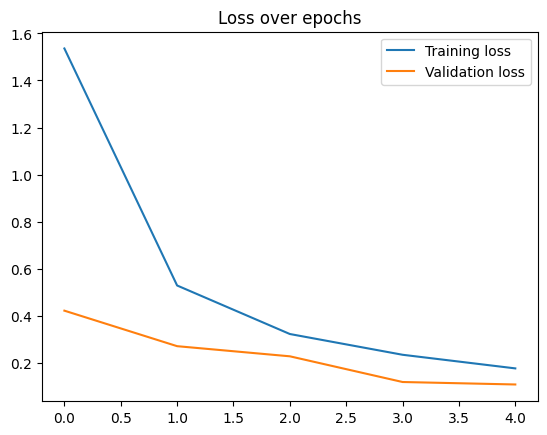

In [26]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()